In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Load Dataset

In [39]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

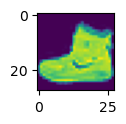

In [42]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[0])

In [43]:
y_train[0]

9

In [44]:
class_names[y_train[0]]

'Ankle boot'

#### Normalizing images

In [45]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

##### Simple Neural Network

In [83]:
#Model with Adam optimizer
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
           
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4712 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3558 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3206 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8899
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.8954


In [84]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8754


[0.34363988041877747, 0.8754000067710876]

In [88]:
y_pred1=model.predict(X_test_scaled)
y_pred1[:3]

313/313 [==============================] - 1s 2ms/step


array([[3.54155691e-06, 1.46040222e-07, 2.86374927e-07, 8.76339570e-08,
        3.99954928e-07, 6.47818670e-03, 1.88678441e-05, 3.28685343e-01,
        5.26247231e-06, 9.11923647e-01],
       [1.97148230e-02, 1.63040255e-07, 9.99864399e-01, 9.85731822e-06,
        6.61885977e-01, 2.36645423e-08, 5.51789343e-01, 3.25781882e-13,
        2.10186481e-05, 1.01815854e-08],
       [3.14440666e-04, 9.99999940e-01, 1.16885104e-07, 1.85884256e-02,
        1.89001890e-04, 1.35838042e-12, 1.11289977e-04, 4.53330007e-18,
        1.08162885e-06, 1.00566768e-11]], dtype=float32)

In [89]:
y_pred_class1=[np.argmax(ele) for ele in y_pred]
y_pred_class1[:5]

[9, 2, 1, 1, 6]

In [90]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
print('cassification Report: \n',classification_report(y_test,y_pred_class1))

cassification Report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.73      0.82      0.77      1000
           5       0.99      0.95      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [92]:
#Model with SGD optimizer
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
           
])
model1.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model1.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6958 - accuracy: 0.7763
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4940 - accuracy: 0.8343
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4519 - accuracy: 0.8448
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4279 - accuracy: 0.8534
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4095 - accuracy: 0.8584


In [93]:
np.argmax(model1.predict(X_test_scaled)[2])

313/313 [==============================] - 1s 2ms/step


1

In [94]:
y_test[2]

1

In [95]:
#model accuracy
model1.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4385 - accuracy: 0.8459


[0.4384825825691223, 0.8458999991416931]

##### Convolutional Neural Network

In [64]:
CNN = keras.Sequential([ 
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

CNN.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3885 - accuracy: 0.8608
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2699 - accuracy: 0.9020
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2250 - accuracy: 0.9164
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1936 - accuracy: 0.9296
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1674 - accuracy: 0.9373


In [75]:
CNN.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.9110


[0.2592964470386505, 0.9110000133514404]

In [76]:
y_pred=CNN.predict(X_test_scaled)
y_pred[:3]

313/313 [==============================] - 1s 1ms/step


array([[1.4462129e-03, 1.1398465e-03, 3.2727864e-02, 6.7208178e-04,
        3.2430012e-03, 8.8441688e-01, 3.6866985e-02, 9.3901151e-01,
        3.1235280e-02, 9.9980581e-01],
       [6.8663079e-01, 1.5977861e-05, 9.9999958e-01, 8.7348580e-02,
        5.2172595e-01, 3.1402610e-08, 9.8230445e-01, 7.9570306e-09,
        1.4659995e-06, 2.0701947e-10],
       [4.5000157e-01, 9.9999988e-01, 1.1599483e-03, 1.5981954e-02,
        3.4113764e-03, 5.4212239e-07, 7.3942818e-02, 2.0502275e-04,
        5.4413922e-05, 2.3544917e-08]], dtype=float32)

In [77]:
y_pred_class=[np.argmax(ele) for ele in y_pred]
y_pred_class[:5]

[9, 2, 1, 1, 0]

In [78]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [79]:
# from sklearn.metrics import confusion_matrix, classification_report
print('cassification Report: \n',classification_report(y_test,y_pred_class))

cassification Report: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.88      0.85      0.86      1000
           5       0.97      1.00      0.98      1000
           6       0.80      0.70      0.75      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

